In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [19]:
data = pd.read_csv("C:\\Users\\muggs\\Desktop\\LP-1 Dataset\\Decision Tree & Naive Bayes Classification\\NaiveBayes.csv")
data.head(10)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [20]:
data.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [22]:
data.describe()

,Age,Salary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [23]:
X = data.drop(columns='Purchased', axis=1)
Y = data['Purchased']
X=pd.get_dummies(X)
X

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y, test_size=0.2,random_state=10)

In [29]:
x_train

array([[-0.0625611 ,  0.27184516],
       [ 0.03295203, -0.25672226],
       [-1.6862843 ,  0.12502088],
       [-1.01769239,  0.53612887],
       [-1.39974491, -1.22576253],
       [-0.54012675,  0.47739916],
       [-1.59077117,  0.53612887],
       [-0.92217926,  0.56549373],
       [-1.78179743, -1.28449224],
       [-0.63563988,  0.18375059],
       [ 1.75218836, -0.28608712],
       [-0.63563988, -0.05116826],
       [-0.25358736, -1.40195167],
       [ 2.03872775, -0.81465453],
       [-1.11320552,  0.30121002],
       [-1.87731056, -0.52100597],
       [ 1.46564897,  1.00596657],
       [-1.01769239,  0.59485858],
       [-0.63563988,  0.03692631],
       [-0.73115301,  0.30121002],
       [-0.92217926,  0.27184516],
       [-0.92217926,  0.4480343 ],
       [ 0.31949142,  0.06629116],
       [ 2.13424088, -1.04957339],
       [ 0.79705706,  0.35993973],
       [ 0.89257019, -1.04957339],
       [-0.44461362, -0.02180341],
       [-1.11320552, -1.60750566],
       [-0.15807423,

In [30]:
model = GaussianNB()

In [31]:
model.fit(x_train,y_train)

GaussianNB()

In [32]:
y_pred = model.predict(x_test)

In [33]:
print(accuracy_score(y_pred, y_test))

0.9125


In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.89      0.86      0.88        29

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



In [35]:
from sklearn.metrics import roc_curve, auc

In [36]:
y_prob = model.predict_proba(x_test)[:,-1]

In [37]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)

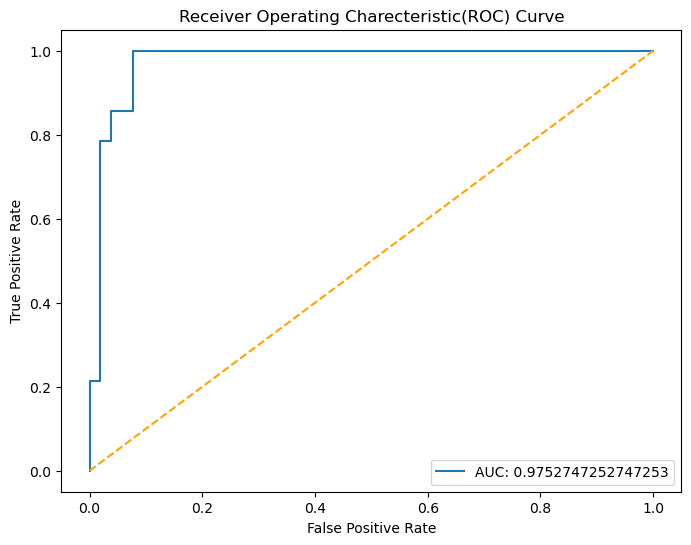

In [38]:

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"AUC: {roc_auc}")
plt.plot([0,1],[0,1],color="orange", linestyle="--")
plt.title("Receiver Operating Charecteristic(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()